### MAP556, Ecole Polytechnique, 2022-23

# TP 5 - Régression empirique pour l'approximation d'espérance conditionnelle


### Exercice 1.  Un exemple de programmation dynamique pour un problème d'arrêt optimal

On considère le processus stochastique à deux pas 

$$X_i = x_0 \ e^{-\frac12 \sigma^2 T_i \ + \ \sigma \, W_{i}}, \quad
\qquad i=0,1,2,
$$

où $x_0$ et $\sigma$ sont deux paramètres positifs, $T_i=i$, et $(W_i)_{0\le i \le 2}$ est un processus à temps discret définit comme suit: $W_0 = 0$, et 

- la v.a.  $W_{1}$ suit une loi Gaussienne $\mathcal{N}(0,T_1)$,


- $W_{2} = W_{1} + \Delta W$, où $\Delta W$ est une v.a. de loi $\mathcal{N}(0,T_2 - T_1)$ indépendante de $W_{1}$.


__Pour la terminologie__: 

 - $(W_i)_{0\le i \le 2}$ est la version en temps discret de ce que l'on appelle un _mouvement Brownien_, un processus défini en temps continu.
 
   En particulier, c'est une chaîne de Markov par rapport à sa filtration $(\mathcal{F}_0, \mathcal{F}_1, \mathcal{F}_2)$, où $\mathcal{F}_i = \sigma(W_0, \dots, W_i)$.


 - Le processus $(X_i)_{0\le i \le 2}$ est appelé _mouvement Brownien géometrique_.


__Le problème d'arrêt optimal__

Dans la suite, on voit le processus $X$ comme modèle aléatoire pour la valeur d'un actif sur un marché (par exemple, une action).

C'est un modèle à temps discret sur deux périodes ($[T_0, T_1]$ et $[T_1, T_2]$), très simplifié donc, mais la nature du problème et la méthode de calcul présentée ci-dessous restent les mêmes si on passe à un système à $n$ dates $T_1,\dots, T_n$.

$\blacktriangleright$ Le contrat financier _option Put Bermuda_ est un exemple de jeu à arrêt optimal entre deux parties (l'acheteur et le vendeur du contrat): l'acheteur du Put Bermuda paye au vendeur un prix $u_0$ à l'instant $T_0$, et gagne en échange le droit de recevoir le montant $(K-X_t)^+ = \max(K-X_t, 0)$ à une date $t\in\{0,1,2 \}$ de son choix.

La constante $K > 0$ est fixée dès le départ (alors que la date d'exercice $t$ du contrat ne l'est pas: elle est arrêtée par l'acheteur pendant la vie du produit).

$\blacktriangleright$ On peut justifier que le juste prix à attribuer à ce produit financier à la date $T_0$ est donné par

$$
u_0 = \sup_{\tau \, \in \, \mathcal{T}_2 } {\mathbb E} \left[ (K - X_\tau)^+ \right],
$$

où $\mathcal{T}_2$ est l'ensemble de temps d'arrêt à valeurs dans $\{0,T_1,T_2\}$ par rapport à la filtration $(\mathcal{F}_i)_{0\le i \le 2}$. 

__La transformation en équation dynamique rétrograde__

On souhaite évaluer $u_0$ par une méthode Monte-Carlo. 

On remarquera que la définition de $u_0$ contient un $\sup$ sur un ensemble infini de fonctions (l'ensemble $\mathcal{T}_2$ de temps d'arrêt).

Une manière de simplifier le calcul est de faire appel à la formulation dynamique du problème: en posant 

$$
Y_i = \mbox{ess}\sup_{\tau \,  \in \,  \mathcal{T}_2: \, \tau \, \ge \, i}
{\mathbb E} \left[ (K - X_\tau)^+|\mathcal F_{i} \right],
$$

de telle manière que
$$
Y_0 = u_0,
$$

on peut montrer que le processus $(Y_i)_{0 \le i \le 2}$ obéit à l'équation rétrograde

$$
\left \{
\begin{aligned}
&Y_2 = (K-X_2)^+
\\
&Y_i = \max \left( (K-X_i)^+, \, {\mathbb E} \left[Y_{i+1}|\mathcal{F}_i\right] \right)
\qquad i = 0, 1.
\end{aligned}
\right.
$$

qui est l'_équation de programmation dynamique_ pour le problème d'arrêt optimal $u_0$. C'est cette équation que nous allons approcher.

#####  Question préliminaire: 
Montrer que $Y_i$ est de la forme $Y_i= u_i (W_i)$ pour une fonction mesurable $u_i: \mathbb{R} \to \mathbb{R}$.
Remarquer que le prix de l'option Bermuda en $t=0$ s'écrit comme l'espérance emboitée suivante

$$
u_0 = Y_0
= \max \left\{ (K-x_0)^+, {\mathbb E} \left[ \max\left( (K - X_1)^+, v_1(W_1) \right) \right] \right\},
$$

où $v_1(W_1) = {\mathbb E}\left[(K-X_2)^+|W_1 \right]$.

$\blacktriangleright$ On note $(W_1^m,W_2^m)_{1 \le m \le M}$ un échantillon de tirages i.i.d. du couple $(W_1,W_2)$, et on pose $X_i^m = x_0 \, e^{-\frac12 \sigma^2 T_i \, + \, \sigma \, W_i^m}$ pour tout $m$.


1. __Valeur de référence (_benchmark_) du prix: on utilise l'expression explicite de la fonction $v_1$.__ Dans cette question, on utilisera la formule
	
    $$
  v_1(w) = {\mathbb E}\left[(K-X_2)^+|W_1 = w \right] = 
  K \, N(-d_2) - x \, N(-d_1)
	$$
    où
	$$
	x = x_0  \, e^{-\frac12 \sigma^2 T_1 + \sigma \, w},
	\qquad d_2 = \frac{\log(x/K)}{\sigma \sqrt{T_2-T_1}} - \frac12 \sigma \sqrt{T_2-T_1},
	\qquad d_1 = d_2 + \sigma \sqrt{T_2-T_1},
	$$
    
	où $N(z) = \int_{-\infty}^z e^{-y^2/2} \frac{dy}{\sqrt{2 \pi}}$ est la fonction de répartition gaussienne, accessible en Python via la fonction `scipy.stats.norm.cdf`.
    
    (Remarque: Dans la terminologie financière, la fonction $\mathrm{v_1}$ est le prix d'une option Put (non Bermuda, mais *Européenne*) dans le modèle de Black-Scholes.)
    
    __1 (a)__. Coder la formule ci-dessus pour la fonction $v_1$. Vérifier que pour les paramètres $x_0=1$, $T_1=1$, $T_2=2 $, $K=1.2$, $\sigma=0.2$, on obtient bien $v_1(0) \approx 0.2374$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from time import time 

In [2]:
## Parametres
K = 1.2
x0 = 1.
sigma = 0.2
 
T2 = 2.
T1 = T2 / 2.
 
M = int(5e3)

In [4]:
###################################################
## Q1 (a): formule explicite
##         pour l'esperance conditionnelle 
###################################################
 
def fonction_v_1(x0, T1, T2, K, W1, sigma):
    """
    La fonction v_1(W1) de la question 1.(a)
    
    Autrement dit: le prix en T1 du Put Black-Scholes de maturite T2
    en fonction de la valeur courante du mouv Brownien en T1.
    
    Paramètres:
    W1: un array numpy
    """
    sigmaSqrtDeltaT = sigma * np.sqrt(T2 - T1)
    x = x0*np.exp(-0.5*sigma**2*T1 + sigma*W1)
    d2 = np.log(x/K)/sigmaSqrtDeltaT - 0.5*sigmaSqrtDeltaT
     
    ######################################
    # TO DO: coder la formule explicite
    # pour la fonction v_1
    ######################################
     
    ## Output: un array de la meme taille que W
    return K*norm.cdf(-d2)-x*norm.cdf(-(d2+sigmaSqrtDeltaT))

print(fonction_v_1(x0, 1, 2, 1.2, 0, 0.2))

0.23742104895721428


La connaissance explicite de la fonction $v_1$ permet d'écrire l'estimateur
$$
u_0^{M} =
\max \Bigl\{ (K-x_0)^+, \frac 1M \sum_{m = 1}^M u_1(W_{1}^m)\Bigr\}
$$

où $u_1(W_{1}^m) = \max\left( (K - X_{1}^m)^+, v_1(W_{1}^m) \right)$.


__1 (c)__ Simuler cet estimateur dans la cellule suivante. Pour calculer le maximum $\max(a,b)$ entre deux nombres, on pourra utiliser la fonction `numpy.maximum(a,b)`.

$\blacktriangleright$ __TCL pour $u_0^{M}$__. On rappelle que la méthode delta (ou méthode de substitution) affirme que si $\overline Y_M$ est la moyenne empirique d'une suite $(Y_m)_{m \ge 1}$ de v.a. i.i.d. de carré intégrable et $f$ une fonction dérivable au point $\mathbb E[Y]$, l'estimateur $f(\overline Y_M)$ de $f(\mathbb E [Y])$ satisfait un TCL:

$$ 
\frac 1{\sqrt{M}} \left( f(\overline Y_M) - f(\mathbb E [Y]) \right)
\to 
\mathcal N \left(0, f'(\mathbb E [Y])^2 \mathrm{Var}(Y) \right).
$$

Pour les valeurs considérées des paramètres, on peut montrer que l'on a

$$
{\mathbb E} \left[ \max\left( (K - X_1)^+, v_1(W_1) \right) \right] > (K-x_0)^+.
$$

L'estimateur $u_0^{M}$ satisfait-il un TCL? Avec quelle variance limite?

In [18]:
###################################################
## On genere les tirages gaussiens et on construit
## le mouv Brownien W et le mouv Brownien géometrique
## aux instants T1 et T2
###################################################
def MBG(x0, T, sigma, W):
    """
    Processus X: mouvement Brownien géometrique à
    l'instant T, de parametre de volatilite sigma,
    a partir de la valeur du mouvement Brownien W
    """
    return x0 * np.exp(-0.5*sigma*sigma*T + sigma * W)
 
time0 = time()
 
#################################################
## TO DO: Remplacer W1, W2 avec un echantillon de
## tirages du mouvement Brownien aux dates T1 et T2
## et X1, X2 avec le MBG correspondant
W1 = np.sqrt(T1)*np.random.randn(M); W2 = W1 + np.sqrt(T2-T1)*np.random.randn(M)
X1 = MBG(x0,T1,sigma,W1); X2 = MBG(x0,T2,sigma,W2)
################################################
 
time0_1 = time()
 
timeSimulations = time0_1 - time0
 
###################################################
### 1. Prix Benchmark
###################################################
 
time1 = time()
 
v_1 = fonction_v_1(x0, T1, T2, K, W1, sigma)
 
################################################
## TO DO: completer avec le calcul du prix
## benchmark u_0^M et l'estimation de la variance
## dans le TCL pour l'estimateur
u_1 = np.maximum(np.maximum(K-X1,0), v_1)
prix_benchmark = np.maximum(np.maximum(K-X1,0), np.mean(u_1))
var_TCL = np.var(u_1)
################################################
 
rayonIC = 1.96 * np.sqrt(var_TCL/M)
 
time2 = time()
 
print("Prix benchmark = %1.4f +/- %1.4f \n" %(prix_benchmark, rayonIC) )
print("Erreur relative (TCL) = %1.3f \n" %(rayonIC / prix_benchmark) )
print("Time: %1.4f \n" %(time2 - time1 + timeSimulations) )

TypeError: only size-1 arrays can be converted to Python scalars

2. __Prix par régression empirique:__ 

   En pratique (si le modèle est plus complexe qu'un mouvement Brownien géometrique, ou s'il y a plus que trois dates $T_0, \dots, T_n$), la fonction à injecter dans l'estimateur Monte-Carlo (ici $v_1$) n'est pas connue explicitement.

   Nous allons donc l'estimer, à partir des même tirages $(X_1^m, X_2^m)$, avec une méthode de régression sur un espace d'approximation.

- On choisit comme espace d'approximation pour la fonction $v_1$ l'espace engendré par les fonctions indicatrices de $n$ intervalles disjoints:
$$
\phi_k = 1_{I_k},
\quad
\mbox{où }
I_k = \left[-a + (k-1) \frac{2a}n, -a + k \frac{2a}n \right[;
\quad a > 0, 
\quad k = 1, \dots, n
$$
$$
\text{Vect}(\phi_1,\dots, \phi_n)
= \left\{\sum_{k=1}^n \alpha_k \phi_k(\cdot): \alpha_1, \dots, \alpha_n \in \mathbb{R} \right\}.
$$
  On remarquera que $\cup_k I_k = [-a, a[$: $a$ est donc un paramètre de troncature (toute fonction d'approximation obtenue sera nulle en dehors de cet intervalle).

  On notera $\alpha \cdot \phi(\cdot) = \sum_{k=1}^n \alpha_k \phi_k(\cdot)$.

 - L'approximation empirique de la fonction $v_1(\cdot)$ est donnée par
$$
\tilde v_1(\cdot) = \sum_{k=1}^{n} \alpha_k^* \ 1_{I_k}(\cdot)
$$
où
$$ \label{e:regrEmp}
\begin{aligned}
\alpha^* \in \underset{\alpha\in \mathbb{R}^n}{\rm arg\min}
\ \sum_{m = 1}^M
\left((K-X_2^m)^+ - \alpha \cdot \phi(W_1^m)\right)^2.
\end{aligned}
$$
Si l'argmin n'est pas unique, on choisira le $\alpha^*$ de norme minimale dans $\mathbb{R}^n$.

L'estimateur par régression empirique du prix du Put Bermuda est maintenant
$$
\tilde{u}_0^{M} = 
\max \Bigl\{
(K - x_0)^+, \frac 1M \sum_{m=1}^M \tilde u_1(W_1^m)
\Bigr\}
$$
où $\tilde u_1(W_1^m) =  \max \left( (K - X_{1}^m)^+, \tilde{v}_1(W_1^m) \right)$.

__2 (a) Question théorique__: Donner l'expression des coefficients de régression $\alpha^*_k$ qui sont solution du problème d'optimisation ci-dessus.

__2 (b) suite__: Utiliser l'expression obtenue pour compléter la fonction coeffsRegressionEmpirique dans la cellule ci-dessous. Compléter le calcul de l'estimateur $\tilde{u}_0^{M}$.

Prix par regression empirique = 0.2469
Time: 0.0177 



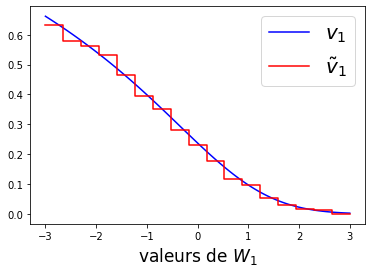

In [14]:
###################################################
### 2. Prix par regression empirique
###################################################
 
##################################
### On genere les cellules I_k
##################################
# Choix de la troncature
a = 3.*np.sqrt(T1)
 
## Dimension n  de l'espace d'approximation.
## Une règle pratique : prendre n de l'ordre de M^{d / (d+2)}
n = int(M**(1./3))
 
intervals = np.linspace(-a, a, n+1)
 
####################################################
## TO DO: calculer
## - Les coefficients de regression empirique alpha
## - Le vecteur v_1_tilde(W1) de taille M
##   dans l'array v_1_tilde
####################################################
def regressionEmpirique(W1, W2, intervals, T2, K, x0, sigma):
    step = intervals[1] - intervals[0]
    alpha = np.zeros(intervals.size - 1)
    
    v_1_tilde = np.zeros(M)
     
    for k in range(intervals.size - 1):
        leftPoint = intervals[k]
        
        # Array de taille M de booléens True/False
        insideCell = np.logical_and( leftPoint <= W1, W1 < leftPoint+step )         
        
        # W2[insideCell]: la valeur W_2[m] est conservée uniquement si insideCell[m] = True
        X_T2 = MBG(x0, T2, sigma, W2[insideCell])
        
        #############################################
        ## TO DO: Completer avec le calcul des
        ## coefficients alpha[k]
        #############################################
        if(np.sum(insideCell)>0):
            alpha[k]=np.mean(np.maximum(K-X_T2,0))
        #############################################
        ## TO DO: Completer avec le calcul de l'approximation
        ## empirique v_1_tilde(W1) (array de taille M)
        #############################################
            v_1_tilde[insideCell]=np.maximum(np.maximum(K-X1[insideCell],0),alpha[k])
    return alpha, v_1_tilde
 
time3 = time()
 
alpha, v_1_tilde = regressionEmpirique(W1, W2, intervals, T2, K, x0, sigma) 

################################################
## TO DO: Completer avec le calcul du prix
## par regression empirique u_tilde_0^M 

prix_RegrEmp = np.mean(np.maximum(np.maximum(K-X1,0), v_1_tilde))
################################################
 
time4 = time()
 
print("Prix par regression empirique = %1.4f" %prix_RegrEmp)
print("Time: %1.4f \n" %(time4 - time3 + timeSimulations))
 
######################################
## On peut afficher la vraie fonction
## v_1 et son approximation empirique
## pour comparaison
#####################################
x = np.linspace(-a, a, 100)
 
v_1_exact = fonction_v_1(x0, T1, T2, K, x, sigma)
 
plt.plot(x, v_1_exact, color="b", label="$v_1$")
 
plt.step(intervals, np.append(alpha, alpha[-1]), where="post", color="r", label=r"$\tilde{v}_1$")
 
plt.xlabel("valeurs de $W_1$", fontsize=17)
plt.legend(loc="best", fontsize=20)


3. __Prix par _Simulations dans les simulations_ (ou _Nested Monte-Carlo_)__. L'estimateur de $u_0^M$ est
$$
\hat{u}_0^{M} = \max \Bigl\{ (K-x_0)^+,
\frac 1M \sum_{m = 1}^M \max\left( (K - X_{1}^m)^+, \hat{v}_{1}^m \right)
\Bigr\}
$$
où pour tout $m$, $\hat{v}_{1}^m$ est obtenue à partir d'un échantillon de $M$ simulations i.i.d.
de la loi de $W_2$ conditionellement à $W_1 = x$ calculée en $x = W_1^m$, notées 
$(W_2^{m,m'})_{1 \le m' \le M}$:
$$
\hat{v}_{1}^m = \frac1{M} \sum_{m' = 1}^M \bigl(K - x_0 \, e^{-\frac12 \sigma^2 T_2 + \sigma \, W_2^{m,m'}} \bigr)^+.
$$
    (a) Quelle est la loi de $W_2$ conditionelle à $W_1 = x$? Pour chaque $m$, simuler les $M$ tirages $W_2^{m, m'}$ suivant cette loi conditionnelle en $x =W_1^m$.
    
    (b) Compléter le calcul de cet estimateur dans le code ci-dessous, et comparer avec les méthodes précédentes.

In [17]:
###################################################
#### 3. Prix "simulations dans les simulations"
###################################################
 
###################################################
## On genere M tirages de X2 pour chaque valeur
## dans l'echantillon X1.
## Il faudra donc repeter les tirages de M gaussiennes iid 
## POUR CHAQUE valeur de X1.
###################################################
sum_u_1 = 0.
 
time7 = time()
 
for m, w1 in enumerate(W1):
    G = np.random.randn(M)
     
    ###################################################
    ## To Do: completer avec
    ## - les tirages de W_2 conditionnellement a W1 = w1
    ## - la mise a jour de la somme des contributions à
    ##   la variable u_1
    W2 = w1+np.sqrt(T2-T1)*G
    sum_u_1 += np.maximum(np.maximum(K-X1[m],0), np.mean(np.maximum(K-MBG(x0,T2,sigma,W2),0)))
    ###################################################

u_0 = np.maximum( np.maximum(K-x0,0.), sum_u_1/M )
    
time8 = time()
 
print("Prix Sim dans sim = %1.4f" %u_0)
print("Time: %1.4f" %(time8 - time7), "\n")

Prix Sim dans sim = 0.2480
Time: 2.8016 



4. __Prix Longstaff-Schwartz:__

   Enfin, il est aussi possible d'approcher le temps d'arrêt $\tau^*$ (qui, pour rappel, est une variable aléatoire) qui atteint l'optimum dans le problème originaire, c'est à dire $\tau^*$ tel que
$$
{\mathbb E} \left[ (K - X_{\tau^*})^+ \right] =
\sup_{\tau \, \in \, \mathcal{T}_2 } {\mathbb E} \left[ (K - X_\tau)^+ \right]
$$
   
   Cette approche est appélée méthode de Longstaff-Schwartz en référence à l'article _[F. Longstaff, E. Schwartz, Valuing American Options by Simulation: A Simple Least-Squares Approach. The Review of Financial Studies, 2001]_.
   
   On peut montrer les propriétés suivantes (qui restent vraies pour le problème à $n$ dates):

+ On pose $\tau^\star = \min\{i\ge 0 : Y_i = (K - X_i)^+ \}$ et on note $(Y^\star_i)_{0\le i \le 2}$ le processus arrêté $Y^\star_i = Y_{i \wedge \tau^\star}$. Montrer que $\tau^\star \in \mathcal{T}_2$ et que
$$
Y^\star_i = \mathbb{E} \left[Y^\star_{i+1} \big|\mathcal{F}_i \right].
$$

  (_Indication_: écrire $Y_{i \wedge \tau^\star} = 1_{i < \tau^\star} Y_i \, + \, 1_{i \ge \tau^\star} Y_{\tau^\star}$ et observer que sur l'événement $\{i < \tau^\star\}$, on a $Y_i = \mathbb{E}[Y_{i+1}|\mathcal{F}_i]$.)


+ Utiliser le processus $(Y^\star_i)_{0\le i \le 2}$ pour montrer que $\tau^\star$ est un temps d'arrêt optimal.

$\blacktriangleright$ On remarquera que la construction de $\tau^*$ ci-dessus nécessite de comparer la variable $(K - X_i)^+$ à la valeur courante de $Y_i = u_i(W_i)$.

En remplaçant la vraie fonction $u_i$ par la fonction $\tilde{u}_i$ estimée par régression empirique, on obtient l'estimateur

$$
\check{u}_0^M = \frac1{M} \sum_{m = 1}^M (K - X^{m}_{\tau_m})^+,
\qquad
\mbox{où }
\tau_m = \left\{
\begin{array}{ll}
0 & \mbox{si } (K-x_0)^+ \ge \tilde u_0^M
\\
1 & \mbox{si } (K-x_0)^+ < \tilde u_0^M \mbox{ et } (K-X_1^m)^+ \ge \tilde{u}_1(W_1^m)
\\
2 & \mbox{sinon}.
\end{array}
\right.
$$

Compléter le calcul de cet estimateur dans le code ci-dessous.

In [19]:
#######################################
### 4. Prix Longstaff-Schwartz
#######################################
time5 = time()
 
def tempsArretOptimal(X1, approx_empirique_T1, K, x0, M):
    ## On réutilise l'approximation empirique definie
    ## plus haut, correspondant a v_1_tilde
    gain_T1 = np.maximum(K - X1, 0.)
    
    u_1_tilde = np.maximum(gain_T1, approx_empirique_T1)
     
    mean_0 = np.mean(u_1_tilde)
     
    if np.maximum((K-x0), 0.) >= mean_0:
        return np.zeros(M)
    else:
        tau = 1 * (u_1_tilde <= gain_T1) \
              + 2 * (u_1_tilde > gain_T1)
     
    return tau
 
###################################################
## To Do: completer avec le calcul
## - du temps d'arret optimal tau (echantillon tau_m)
## - de l'estimateur Longstaff-Schwartz du prix
##
tau = tempsArretOptimal(X1, v_1_tilde, K, x0, M)
val = (tau==0)*np.maximum(K-x0,0)+(tau==1)*np.maximum(K-X1,0)+(tau==2)*np.maximum(K-X2,0)
estimateur_LongSchwartz = np.mean(val)
###################################################
 
time6 = time()
 
print("Prix Longstaff-Schwartz = %1.4f" %estimateur_LongSchwartz)
print("Time: %1.4f \n" %(time6 - time5 + time4 - time3 + timeSimulations))

Prix Longstaff-Schwartz = 0.2418
Time: 0.0308 

